<a href="https://colab.research.google.com/github/jeonbyeongguk/cuckoobee/blob/main/Data%20Science/Machine%20Learning/ML_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1. Linear Regression**

In [ ]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [ ]:
# 데이터셋 불러오기 
# 주택 판매가격 데이터 https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

import pandas as pd

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/house-prices/house_prices_train.csv')

print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 1. 선형회귀모델
- 독립변수(특성) x와 종속변수(타겟) y가 선형 관계에 있으며 비용함수가 최소가 되는 파라미터를 찾도록 학습한 모델
  - 파라미터를 추정하는 방법으로 최소제곱법이 널리 쓰인다.
- 데이터는 적은데 모델이 복잡하면 과적합이 발생하기 쉬우므로 데이터가 적을 때에는 단순한 모델의 일반화 성능이 더 높을 수 있다. 
- 데이터의 특징에 따라 선형회귀를 사용하는 것이 더 적합할 수 있다. 

### 1-1. 기준모델
- 예측 모델을 만들기에 앞서 가장 간단하고 직관적이며 최소한의 성능을 나타내는 기준이 되는 모델 
- 간단한 예측모델도 기준모델로 설정할 수 있다.
  - e.g. 단순선형회귀, 로지스틱 회귀 등 

In [ ]:
from sklearn.metrics import mean_absolute_error

# 모델 학습을 위해 특성 X와 타겟 y 지정 
feature = ['GrLivArea']
target = ['SalePrice']
X = df[feature]
y = df[target]

# 타겟 평균 설정
predict = y.mean()

# 기준모델 예측값(평균값) 배열 생성 
base_pred = [predict]*len(y)

# MAE
mean_absolute_error(y, base_pred)

57434.77027584912

### 1-2. 단순선형회귀
- 1개의 특성에 기반하는 선형회귀 모델

In [ ]:
from sklearn.linear_model import LinearRegression

# 모델 학습 
model = LinearRegression()
model.fit(X, y) 

# MAE
y_pred = model.predict(X)
mean_absolute_error(y, y_pred)

37638.72898759625

### 1-3. 회귀계수 해석
- 특성과 타겟 사이에서 어떤 관계를 학습했는지 회귀계수의 영향력을 설명할 수 있다. 

In [ ]:
model.coef_

array([[107.13035897]])

## 2. 일반화
- 모델을 만드는 데 사용된 분포와 동일한 분포에서 추출한, 이전에는 볼 수 없었던 새로운 데이터에 적절하게 적응하는 모형의 능력 
  - 모델 검증(개선)과 일반화 성능 확인을 위해 3way Hold-out 또는 CV 사용
- 과적합 <br>
$\rightarrow$ 모델의 복잡도를 감소시켜 분산 에러를 줄이는 방향으로 개선
  - 데이터 추가 수집
  - 특성 줄이기
  - 정규화 모델에서 $\lambda$ 증가
- 과소적합 <br>
$\rightarrow$ 모델이 데이터에 더 잘 맞도록 하여 편향 에러를 줄이는 방향으로 개선
  - 특성 늘리기 (feature engineering 등) 
  - 다항 특성 추가 ($x^2$, $x^3$, $x_1x_2$, $⋯$) 
  - 정규화 모델에서 $\lambda$ 감소 

In [ ]:
from sklearn.model_selection import train_test_split

# 데이터셋을 훈련/테스트셋으로 나누기
train, test = train_test_split(df, random_state=2)

# 훈련셋을 훈련/검증셋으로 나누기 
train, val = train_test_split(train, random_state=2)

print(train.shape, val.shape, test.shape)

(821, 81) (274, 81) (365, 81)


### 2-1. 다중선형회귀
- 2개 이상의 특성을 사용하는 선형회귀 모델 

In [ ]:
# 특성 X와 타겟 y 지정 
target = 'SalePrice'
features = ['GrLivArea', 'OverallQual']
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [ ]:
# 다중선형회귀
multiple = LinearRegression()
multiple.fit(X_train, y_train)
train_pred = multiple.predict(X_train)
test_pred = multiple.predict(X_test)

print('훈련셋 MAE :', mean_absolute_error(y_train, train_pred))
print('테스트셋 MAE :', mean_absolute_error(y_test, test_pred))

훈련셋 MAE : 29676.24901261883
테스트셋 MAE : 29691.094465993916


### 2-2. 회귀평가지표
- MSE
  - 오차 제곱의 평균
  - 제곱을 취하므로 이상치에 민감
- RMSE
  - 오차 제곱의 평균의 제곱근
  - 관측값의 스케일과 비슷해지므로 MSE에 비해 해석이 용이하다. 
- MAE
  - 오차 절대값의 평균
  - 직관적으로 이해하기 쉽다.
- $R^2$
  - feature가 target을 얼만큼 설명해 주는지 모델의 설명력을 나타내는 지표로, 1에 가까울수록 설명력이 높고 0에 가까울수록 설명력이 낮다. 

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_pred)

print('테스트셋 MSE :', mse)
print('테스트셋 RMSE :', rmse)
print('테스트셋 R2 :', r2)

테스트셋 MSE : 2264185394.7822766
테스트셋 RMSE : 47583.45715458553
테스트셋 R2 : 0.6801003225295444


## 3. 정규화
- 선형 모델에 규제항을 더해 과적합을 방지하는 방법 
  - 규제항으로 인해 회귀계수가 감소하여 모델의 복잡도 감소  
- 일반적으로 정규화된 선형회귀의 성능이 더 좋다. 

### 3-1. 원핫인코딩
- n개의 범주를 가진 범주형(명목형) 특성을 n개의 이진 특성(0 또는 1)으로 변환
- n개의 새로운 특성이 생성되므로 범주가 너무 많은 경우(high cardinality)에는 적절하지 않다.  

In [ ]:
!pip install category_encoders 

In [ ]:
blood = pd.DataFrame({'BloodType': ['A', 'A', 'O', 'AB', 'B', 'AB', 'B', 'O', 'A', 'B']})
blood

,BloodType
0,A
1,A
2,O
3,AB
4,B
5,AB
6,B
7,O
8,A
9,B


In [ ]:
train = blood[:7]
test = blood[7:]

In [ ]:
from category_encoders import OneHotEncoder


encoder = OneHotEncoder(use_cat_names = True) 
train_oh = encoder.fit_transform(train)
train_oh

,BloodType_A,BloodType_O,BloodType_AB,BloodType_B
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,1
5,0,0,1,0
6,0,0,0,1


In [ ]:
test_oh = encoder.transform(test)
test_oh

,BloodType_A,BloodType_O,BloodType_AB,BloodType_B
7,0,1,0,0
8,1,0,0,0
9,0,0,0,1


### 3-2. 릿지회귀
- 가중치들의 제곱합을 패널티(L2 penalty)로 부여하여 회귀계수의 크기 감소 
  - cost $= RSS + \lambda\sum_{j=1}^p\beta_j^2 = \sum_{i=1}^n(y_i - \beta_0 - \beta_1x_{i1}-\dotsc-\beta_px_{ip})^2 + \lambda\sum_{j=1}^p\beta_j^2$
- 영향력이 크지 않은 회귀계수의 값은 0에 근사
    - 특성 선택의 효과
    - 입력 특성의 스케일에 민감하기 때문에 반드시 특성 스케일 표준화
- $\lambda$(lambda) (또는 $\alpha$(alpha))
  - 패널티의 강도를 조절하는 하이퍼파라미터
  - $\lambda$의 크기가 클수록 회귀계수 값 감소
    - $\lambda=0$이면, 기존 회귀모델과 동일
    - $\lambda=∞$이면, 회귀모델은 $\beta_0$에 근사

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.5, normalize=True)
ridge.fit(X_train, y_train)
train_pred = ridge.predict(X_train)
val_pred = ridge.predict(X_val)

print('훈련셋 MAE :', mean_absolute_error(y_train, train_pred))
print('검증셋 MAE :', mean_absolute_error(y_val, val_pred))

훈련셋 MAE : 29516.5808771329
검증셋 MAE : 26089.45003393034


In [ ]:
alphas = [0.01, 0.05, 0.1, 0.2, 1.0, 10.0, 100.0]

for alpha in alphas:
    print('alpha :', alpha)
    ridge = Ridge(alpha=alpha, normalize=True)
    ridge.fit(X_train, y_train)
    train_pred = ridge.predict(X_train)  
    val_pred = ridge.predict(X_val)  
    print('훈련셋 MAE :', mean_absolute_error(y_train, train_pred))
    print('검증셋 MAE :', mean_absolute_error(y_val, val_pred))     

alpha : 0.01
훈련셋 MAE : 29600.038515918146
검증셋 MAE : 27973.388320499176
alpha : 0.05
훈련셋 MAE : 29322.75479818846
검증셋 MAE : 27562.022742670408
alpha : 0.1
훈련셋 MAE : 29099.181697705593
검증셋 MAE : 27133.076746408522
alpha : 0.2
훈련셋 MAE : 28929.038152453224
검증셋 MAE : 26446.38262564634
alpha : 1.0
훈련셋 MAE : 32341.069921903858
검증셋 MAE : 28295.55811323793
alpha : 10.0
훈련셋 MAE : 51419.71475139301
검증셋 MAE : 46282.77488276599
alpha : 100.0
훈련셋 MAE : 57177.81261376446
검증셋 MAE : 51627.06242153641


In [ ]:
# RidgeCV를 통한 최적 패널티(alpha, lambda) 검증 
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=alphas, normalize=True, scoring='neg_mean_absolute_error', cv=3)
ridge.fit(X_train, y_train)
print("alpha: ", ridge.alpha_)

alpha:  0.2


## 4. Logistic Regression
- 선형회귀에 시그모이드(로지스틱) 함수를 씌워 특정 범주에 속할 확률을 계산함으로써 범주 예측  
- sklearn의 로지스틱 회귀모델은 디폴트로 l2 penalty가 적용되는 정규화 모델 
  - 모델을 만들기 전 표준화 작업 필요

In [ ]:
# H1N1 데이터셋 불러오기
target = 'vacc_h1n1_f'
# target = 'vacc_seas_f'
train = pd.merge(pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train.csv'), 
                 pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train_labels.csv')[target], left_index=True, right_index=True)
test = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/test.csv')

In [ ]:
# 데이터셋 나누기
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=2)

In [ ]:
# 기준모델 
train[target].value_counts(normalize=True).max()

0.7609346736648578

In [ ]:
# feature engineering
def engineer(df):
    """특성을 엔지니어링 하는 함수입니다."""
    
    # 높은 카디널리티를 가지는 특성을 제거합니다.
    selected_cols = df.select_dtypes(include=['number', 'object'])
    labels = selected_cols.nunique() # 특성별 카디널리티 리스트
    selected_features = labels[labels <= 30].index.tolist() # 카디널리티가 30보다 작은 특성만 선택합니다.
    df = df[selected_features]
    
    # 새로운 특성을 생성합니다.
    behaviorals = [col for col in df.columns if 'behavioral' in col] 
    df['behaviorals'] = df[behaviorals].sum(axis=1)
    
    
    dels = [col for col in df.columns if ('employment' in col or 'seas' in col)]
    df.drop(columns=dels, inplace=True)
        
    return df


train = engineer(train)
val = engineer(val)
test = engineer(test)

In [ ]:
# 특성과 타겟 분리
features = train.drop(columns=[target]).columns
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Encoder
enc = OneHotEncoder(use_cat_names=True)
X_train_encoded = enc.fit_transform(X_train)
X_val_encoded = enc.transform(X_val)

# Imputer
imp_mean = SimpleImputer()
X_train_imputed = imp_mean.fit_transform(X_train_encoded)
X_val_imputed = imp_mean.transform(X_val_encoded)

# Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

# 모델 학습
logistic = LogisticRegression()
logistic.fit(X_train_scaled, y_train)

# 검증셋 정확도 
logistic.score(X_val_scaled, y_val) # 정확도 반환 

0.8185268651405527

In [ ]:
logistic.predict(X_val_scaled) # 범주 예측

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
logistic.predict_proba(X_val_scaled) # 각 범주에 속할 확률 반환

array([[0.73289411, 0.26710589],
       [0.75762041, 0.24237959],
       [0.90173344, 0.09826656],
       ...,
       [0.84690935, 0.15309065],
       [0.97326638, 0.02673362],
       [0.67410822, 0.32589178]])

### 4-1. 회귀계수 해석
- 회귀계수가 양수이면 타겟이 1일 확률 증가 
- 회귀계수가 음수이면 타겟이 1일 확률 감소 

In [ ]:
pd.Series(logistic.coef_[0], X_train_encoded.columns).sort_values(ascending=False)

doctor_recc_h1n1                                    0.699590
opinion_h1n1_vacc_effective_Very Effective          0.340579
health_worker                                       0.223640
opinion_h1n1_risk_Somewhat High                     0.215022
health_insurance                                    0.210907
opinion_h1n1_risk_nan                               0.202797
opinion_h1n1_risk_Very High                         0.179106
agegrp_65+ Years                                    0.118383
opinion_h1n1_sick_from_vacc_Not At All Worried      0.100788
behavioral_face_mask                                0.092282
h1n1_knowledge                                      0.083859
behavioral_antiviral_meds                           0.077025
hhs_region                                          0.073916
behavioral_wash_hands                               0.073363
education_comp                                      0.064142
child_under_6_months                                0.054552
agegrp_55 - 64 Years    

# **Part 2. Tree Based Model and Classification**

## 1. Decision Trees

- 비용함수를 최소화 하는 특성에 대해 Boolean으로 대답하면서 데이터를 분할하고, 최종 타겟값을 도출하는 모델
- 회귀와 분류 모두 사용 가능
- 회귀에서는 최종 노드의 데이터들을 평균, 분류에서는 최빈값을 통해 타겟값을 도출
- 노드를 어떻게 분할할 것인가를 기준으로 학습을 진행한다. → 불순도의 감소량이 가장 큰 특성과 조건 사용.
- 분류문제의 비용함수로는 지니불순도와 엔트로피가 있다.

In [ ]:
!pip install category_encoders

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
target = 'vacc_h1n1_f'
# target = 'vacc_seas_f'
train = pd.merge(pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train.csv'), 
                 pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train_labels.csv')[target], left_index=True, right_index=True)
test = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/test.csv')

In [ ]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=2) # 클래스가 불균형하기 때문에 stratify 파라미터로 타겟이 잘 나눠지도록 함.


train.shape, val.shape, test.shape

((33723, 39), (8431, 39), (28104, 38))

In [ ]:
train[target].value_counts(normalize=True) # 클래스가 불균형하다. 이걸 유의하면서 전처리 및 모델링을 진행해야 한다.

0    0.760935
1    0.239065
Name: vacc_h1n1_f, dtype: float64

In [ ]:
# 특성 타겟 분리
features = train.drop(columns=[target]).columns
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [ ]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [ ]:
pipe = make_pipeline(
    OrdinalEncoder(), # 트리모델에서는 범주의 순서가 영향을 주지 않기 때문에 Ordinal encoding을 사용해도 된다.
    # 추가로 수치의 크기와 분포가 중요한 것이 아니라 대소 관계만 중요하기 때문에 스케일링이 필요없다.
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=42, criterion='entropy')
)

pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('검증 정확도: ', pipe.score(X_val, y_val))

훈련 정확도:  0.9977166918720162
검증 정확도:  0.7483098090380738


In [ ]:
pipe = make_pipeline(
    OrdinalEncoder(),  
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth = 6)
)

pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('검증 정확도: ', pipe.score(X_val, y_val))

훈련 정확도:  0.8204192984016843
검증 정확도:  0.8205432333056577


In [ ]:
pipe

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['opinion_h1n1_vacc_effective',
                                      'opinion_h1n1_risk',
                                      'opinion_h1n1_sick_from_vacc',
                                      'opinion_seas_vacc_effective',
                                      'opinion_seas_risk',
                                      'opinion_seas_sick_from_vacc', 'agegrp',
                                      'employment_status', 'census_msa',
                                      'employment_industry',
                                      'employment_occupation', 'state'],
                                mapping=[{'col': 'opinion_h1n1_vacc_eff...
NEW YORK               33
NORTH CAROLINA         34
CALIFORNIA             35
MISSOURI               36
NEW MEXICO             37
OHIO                   38
TENNESSEE              39
FLORIDA                40
NEW HAMPSHIRE          41
IDAHO                  42
MAINE              

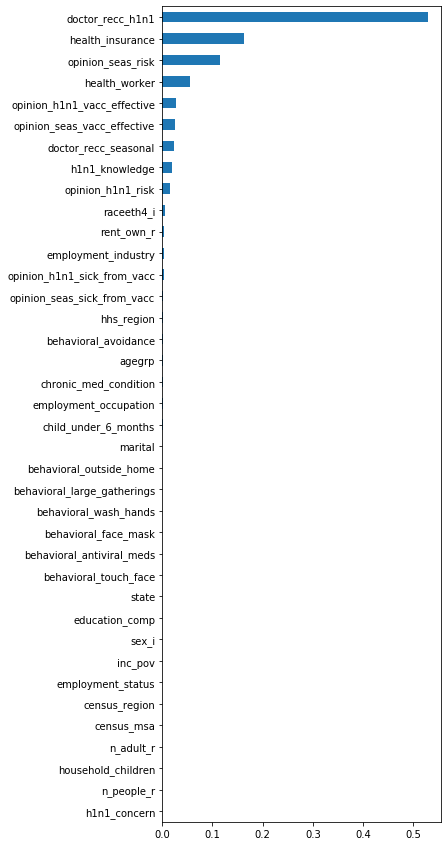

In [ ]:
model_dt = pipe.named_steps['decisiontreeclassifier']
encoded_columns = pipe.named_steps['ordinalencoder'].transform(X_val).columns
importances = pd.Series(model_dt.feature_importances_, encoded_columns)
plt.figure(figsize=(5,15))
importances.sort_values().plot.barh();


## 2. RandomForest

- 앙상블 모델 중 배깅 기법을 사용하는 대표적인 모델.
- 결정트리를 기본 모델로 사용하여 각 기본 모델들의 예측 결과를 회귀에선 평균, 분류에선 다수결의 방법을 사용하여 최종 타겟값을 결정하는 모델.
- 배깅은 랜덤 복원추출을 통해 여러개의 기본 모델들을 만들고 각 기본모델들의 결과를 위와 같이 합치는 것을 의미.

<src img = 'https://imgur.com/UjUnBJ0.png'>


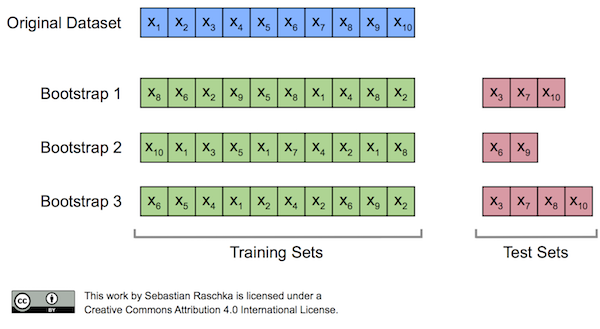

- 복원 추출시에 뽑히지 않는 데이터를 OOB라고 하고 이 OOB는 각 기본모델들의 성능만 평가하는 용도로 사용하기 때문에 최종 모델의 성능을 평가하기 위해서는 검증 데이터가 따로 필요하다.
- 랜덤 포레스트는 기본 모델을 이루는 데이터와 특성이 모두 랜덤하게 사용되기 때문에 다양한 트리가 형성되어 다양한 트리들이 합쳐지는 과정에서 분산 에러가 상쇄되어 과적합을 해소한다. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pipe = make_pipeline(
    OrdinalEncoder(),  
    SimpleImputer(), 
    RandomForestClassifier(random_state=42)
)

pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('검증 정확도: ', pipe.score(X_val, y_val))

훈련 정확도:  0.9977166918720162
검증 정확도:  0.8292017554264025


In [ ]:
pipe = make_pipeline(
    OrdinalEncoder(),  
    SimpleImputer(), 
    RandomForestClassifier(random_state=42, max_depth = 8)
)

pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('검증 정확도: ', pipe.score(X_val, y_val))

훈련 정확도:  0.829315304095128
검증 정확도:  0.8252876289882576


## 3. Evaluation Metrics for Classification
- Precision(정밀도): 모델이 참이라고 예측한 데이터 중 실제로 참인 데이터의 비율
- Recall(재현율): 실제로 참인 데이터 중 모델이 참이라고 예측한 데이터의 비율
- F1-score: Precision과 Recall에 동일한 가중치를 주어 잘못 예측한 부분도 고려한 평가지표. 데이터가 불균형한 경우 사용 가능.

**수식을 외우는 것보다 각 평가지표가 어떤 의미이고 데이터마다 더 적절한 평가지표가 무엇일지 판단하는게 중요하다.**

- 임계값을 올리면 Precision이 증가, 내리면 Recall이 증가(하나씩만 외우고 나머지 지표를 반대라고 생각하면 편함)
- ROC curve: 임계값의 변화에 따라 잘 예측할 비율인 TPR과 잘못 예측할 비율인 FPR의 관계를 그린 그래프
- TPR을 최대화, FPR을 최소화 시키는 임계값을 찾는 것 뿐만 아니라 모델의 확률값을 기반으로 분류 능력을 평가하는 지표로도 사용된다.
- AUC: Roc-curve의 밑면적으로 면적이 크다는 것은 잘 예측할 확률이 크게 증가할 때 잘못 예측할 확률이 작게 증가하는 것이므로 좋은 것. 이진분류에서는 1을 1이라고 0을 0이라고 잘 분류해낼 수 있는 능력이고 1과 0의 결과값보다는 1과 0에 속할 확률값이 더 중요할 때 사용.

**모델을 평가할 때 하나의 지표가 아니라 다양한 지표를 사용해서 가장 지표들의 성능이 좋은 모델을 선택해야한다.**

Ex) 정확도, F1-score, AUC 모두 사용



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve 
import numpy as np

In [ ]:
def show_result(my_pipe, X_data = X_val, y_data = y_val, threshold = 0.5):
    # 1과 0이라는 결과값이 중요한 지표들
    y_pred_proba = pipe.predict_proba(X_data)[:,-1]
    y_pred = y_pred_proba >= threshold
    print('Precision Score: ',precision_score(y_data, y_pred)) # 무조건 y_true 먼저
    print('Recall Score: ',recall_score(y_data, y_pred))
    print('F1 Score:',f1_score(y_data, y_pred))
    print('Accuracy Score:',accuracy_score(y_data, y_pred))
    
    y_pred_proba = pipe.predict_proba(X_data)[:,-1]
    print('AUC Score:', roc_auc_score(y_data, y_pred_proba))

In [ ]:
show_result(pipe) # 1. 백신을 맞았는데 안 맞았다고 예측하는 경우(FN) vs 2. 백신을 안 맞았는데 맞았다고 예측한 경우(FP) ??

Precision Score:  0.7754065040650406
Recall Score:  0.37866004962779154
F1 Score: 0.5088362787595865
Accuracy Score: 0.8252876289882576
AUC Score: 0.8400031636170119


In [ ]:
# 맞았는데 안 맞았다고 예측헀다면 낭비, 하지만 안 맞았는데 맞았다고 예측해서 안 맞추면 집단 면역 관점에서 손해.
# 두 가지 모두 다 애매한 경우도 있다. 이 경우 공평하게 F1-score를 높이는 방법도 있음.

In [ ]:
def draw_roc(my_pipe):
  y_pred_proba = pipe.predict_proba(X_val)[:,-1]
  threshold = np.arange(0.3,0.6,0.02)
  fprs, tprs, th = roc_curve(y_val, y_pred_proba)
  plt.plot(fprs , tprs, label='ROC')

  for t in threshold:
    y_pred = y_pred_proba >= t
    val_f1 = round(f1_score(y_val, y_pred),4)
    val_roc = round(roc_auc_score(y_val, y_pred),4)
    print(round(t,2), val_f1, val_roc)

0.3 0.6216 0.7573
0.32 0.628 0.7582
0.34 0.6227 0.7508
0.36 0.6202 0.7458
0.38 0.6073 0.7348
0.4 0.5986 0.7276
0.42 0.5879 0.7196
0.44 0.578 0.7124
0.46 0.5558 0.6984
0.48 0.5206 0.6784
0.5 0.5088 0.6721
0.52 0.4901 0.6628
0.54 0.4726 0.6545
0.56 0.4555 0.6467
0.58 0.4272 0.6344


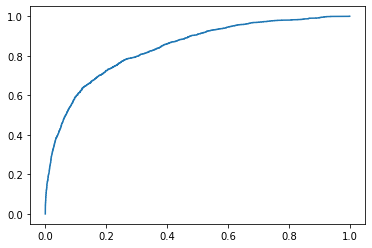

In [ ]:
draw_roc(pipe) # 0.32가 F1_score가 제일 높다.

In [ ]:
show_result(pipe, threshold = 0.32) # AUC 스코어는 변하지 않았다. 임계값의 변화에 영향을 받지 않기 때문에. 똑같은 모델을 사용했다면 임계값이 변하더라도 확률값이 변하는게 아니다.

Precision Score:  0.6121583411875589
Recall Score:  0.6446650124069478
F1 Score: 0.6279912980420593
Accuracy Score: 0.8174593761119677
AUC Score: 0.8400031636170119


## 4. Model Selection
- 3-way hold out: 데이터셋을 훈련/검증/테스트셋 각각 하나의 셋으로 나워서 검증하는 방법.
- Kfold cv: 데이터를 k개의 세트로 나누고 k-1개를 훈련, 나머지를 검증 데이터로 사용하여 교차로 검증하는 방법.
- Grid search cv: 주어진 범위 내에 모든 조합을 검증하여 최적의 조합을 찾는 방법
- Randomized search cv: 주어진 범위 내에서 사용자가 지정한 수만큼 랜덤하게 조합을 검증하여 최적의 조합을 찾는 방법.

In [ ]:
from sklearn.model_selection import cross_val_score
pipe = make_pipeline(
    OrdinalEncoder(),  
    SimpleImputer(), 
    RandomForestClassifier(random_state=42, max_depth = 8)
)

k = 3
scores = cross_val_score(pipe, X_train, y_train, cv=k,  #교차검증
                         scoring='f1')
print('f1_score: ', np.mean(scores))

f1_score:  0.5003661409169714


In [ ]:
#하이퍼파라미터 튜닝
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state = 42))

dists = {
    'simpleimputer__strategy': ['mean', 'median', 'most_frequent'], 
    'randomforestclassifier__n_estimators': randint(50, 500), 
    'randomforestclassifier__max_depth': np.arange(5,15,2), 
}

clf = RandomizedSearchCV(
    pipe,
    param_distributions = dists,
    n_iter = 10, #이 수만큼 random하게 튜닝 파라미터를 조합하여 반복.random 조합 시도 횟수
    cv = 2,
    scoring = 'f1',
    verbose = 1,
    n_jobs = -1,
    random_state = 42
)
clf.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('simpleimputer', SimpleImputer()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': array([ 5,  7,  9, 11, 13]),
                                        'randomforestclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4ec60ad410>,
                                        'simpleimputer__strategy': ['mean',
                                                                    'median',
                                                                    'most_frequent']},
                   random_state=42, scoring='f1', verbose=1)

In [ ]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('F1: ', clf.best_score_)

최적 하이퍼파라미터:  {'randomforestclassifier__max_depth': 13, 'randomforestclassifier__n_estimators': 285, 'simpleimputer__strategy': 'mean'}
F1:  0.5318730008779451


In [ ]:
best_model = clf.best_estimator_ # 최적의 파라미터 조합이 적용된 모델
best_threshold = 0.32
y_pred_proba_val = best_model.predict_proba(X_val)[:, 1] 
y_pred_val = np.where(y_pred_proba_val >= best_threshold, 1, 0)
print(y_pred_val[:10]) # threshold를 조정한 후 타겟값
print(f1_score(y_val, y_pred_val)) #0.627보다 성능 향상

[0 0 0 1 0 0 0 1 0 1]
0.6329472937839754


# **Part 3. Boosting and Interpreting Model**

## 1. Feature Importances, Permutation Importance
- MDI(Mean Decreasing Impurity): 트리모델에서 불순도의 감소량의 평균을 기반으로 중요도를 매김
- Permutation Importance: 모델의 학습 후 특정 변수의 값의 순서를 무작위로 섞고, 모델의 성능을 재측정하기 때문에 재학습이 필요없음. 쉽게 말하면 다른 변수를 고정하고, 한 변수의 값만 무작위로 섞는다. 원래 있는 값들을 랜덤하게 순서만 섞는 것.

In [ ]:
best_pipe = make_pipeline(OrdinalEncoder(),
                          SimpleImputer(strategy = 'mean'),
                          RandomForestClassifier(max_depth = 13, n_estimators = 230, random_state = 42))
best_pipe.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['opinion_h1n1_vacc_effective',
                                      'opinion_h1n1_risk',
                                      'opinion_h1n1_sick_from_vacc',
                                      'opinion_seas_vacc_effective',
                                      'opinion_seas_risk',
                                      'opinion_seas_sick_from_vacc', 'agegrp',
                                      'employment_status', 'census_msa',
                                      'employment_industry',
                                      'employment_occupation', 'state'],
                                mapping=[{'col': 'opinion_h1n1_vacc_eff...
NEW YORK               33
NORTH CAROLINA         34
CALIFORNIA             35
MISSOURI               36
NEW MEXICO             37
OHIO                   38
TENNESSEE              39
FLORIDA                40
NEW HAMPSHIRE          41
IDAHO                  42
MAINE              

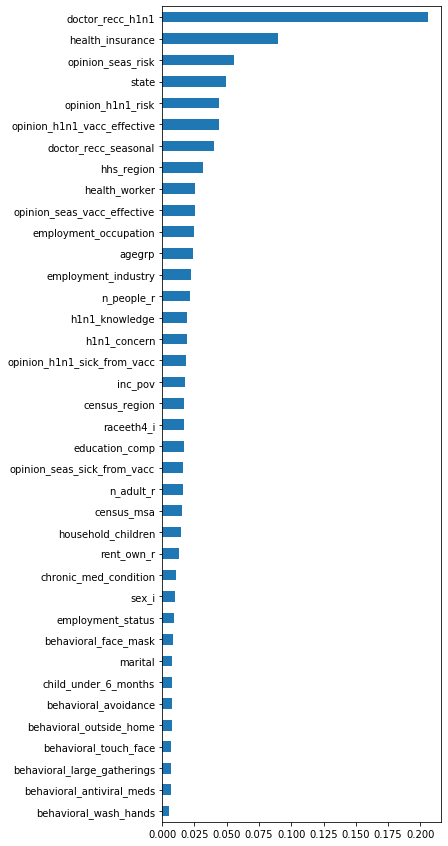

In [ ]:
encoded_columns = best_model.named_steps['ordinalencoder'].transform(X_val).columns
importances = pd.Series(best_model.named_steps['randomforestclassifier'].feature_importances_, encoded_columns)
plt.figure(figsize=(5,15))
importances.sort_values().plot.barh();

In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    best_model.named_steps['randomforestclassifier'],
    scoring='f1', # 회귀에서는 r2나 negative_mae.... 등등
    n_iter=5, # 다른 random 한 방법으로 5번 반복
    random_state=42
)

In [ ]:
X_val_encoded = best_model.named_steps['ordinalencoder'].transform(X_val)
X_val_transformed = best_model.named_steps['simpleimputer'].transform(X_val_encoded)

# 스코어를 다시 계산하기 위한 fit. 재학습은 아니다.
permuter.fit(X_val_transformed, y_val);

eli5.show_weights(
    permuter, 
    top=None, # 상위 몇개의 변수를 볼 것인가. None은 전체
    feature_names=X_val_encoded.columns.tolist() # 변수 이름들
) # 첫번째 숫자는 성능 변화 여부, 두번째 숫자는 다른 방법으로 랜덤하게 섞었을 때 어떻게 변할지에 대한 범위. 쉽게 말해서 신경 안 써도됨.
# https://www.linkedin.com/pulse/how-use-scikit-learn-eli5-library-compute-permutation-abhinav-prakash 
# 예를 들어 축구팀에 있어서 한 선수를 빼고 대회를 진행했을 때 성적이 떨어지면 그 선수가 좋은선수, 성적이 그대로이거나 올라가면 그저 그런 선수거나 팀에 해가되는 선수라는 것이다. 

Weight,Feature
0.2590 ± 0.0197,doctor_recc_h1n1
0.1076 ± 0.0106,health_insurance
0.0348 ± 0.0087,opinion_seas_risk
0.0307 ± 0.0039,health_worker
0.0275 ± 0.0060,opinion_h1n1_vacc_effective
0.0274 ± 0.0063,opinion_h1n1_risk
0.0210 ± 0.0081,doctor_recc_seasonal
0.0176 ± 0.0085,opinion_seas_vacc_effective
0.0107 ± 0.0041,h1n1_knowledge
0.0074 ± 0.0021,behavioral_face_mask


## 2. Boosting
- 각 기본모델들이 다음 모델을 만들 때 잘못 예측한 부분에 집중해서 학습하여 모델의 성능을 높이는 기법을 사용한 앙상블 기법.
- 기본모델들은 서로 영향을 미친다.
- 각 기본모델들의 결과를 가중합을 사용하고 더 잘 예측한 모델에 더 큰 가중치를 준다.
- 여러 친구들에게 적당히 문제를 풀게 해서 결과를 합치고 하나의 답을 도출하기 vs 문제를 잘 못 맞춘 친구를 계속 데리고와서(한놈만 팬다) 이해를 잘 할 때까지 알려주고 이 친구의 학습 과정을 보면서 답을 도출하기
- 대표적인 모델: XGBoost
- 하이퍼파라미터에 민감하기 때문에 튜닝에 따라 성능을 높여볼 수 있다. 
  - `n_estimators`
    - weak learner들의 수를 결정합니다.
  - `learning_rate`
    - 단계별로 weak learner들을 얼마나 반영할지 결정합니다.
    - 0~1의 범위를 갖습니다
      - 값이 너무 크면 과적합이 발생하기 쉽습니다.
      - 값이 너무 작으면 학습이 느려집니다.
    - 일반적으로 0.05 ~ 0.3 정도의 범위에서 탐색을 진행합니다.
  - `max_depth`
    - 각 weak learner 트리들의 최대 깊이를 결정합니다.
    - 모델의 성능에 가장 큰 영향을 주는 변수입니다.
    - 0 ~ ∞의 범위를 갖습니다.
      - -1으로 설정 시 깊이의 제한이 없습니다.
      - 값이 너무 크면 과적합이 발생하기 쉬우며 메모리 사용량이 늘어납니다.
    - 일반적으로 5 ~ 12 정도의 범위에서 탐색을 진행합니다.
  - `min_child_weight` 
    - leaf 노드에 포함되는 관측치의 수를 결정합니다.
    - 0 ~ ∞의 범위를 갖습니다.
      - 값이 커질수록 weak learner들의 복잡도가 감소합니다.
    - 일반적으로 과적합 발생 시 1, 2, 4, 8...와 같이 값을 2배씩 늘려 성능을 확인합니다.
  - `subsample`
    - 각 weak learner들을 학습할 때 과적합을 막고 일반화 성능을 올리기 위해 전체 데이터 중 일부를 샘플링하여 학습합니다.
    - subsample 파라미터가 데이터(row)를 샘플링할 비율을 결정합니다.
    - 0 ~ 1의 범위를 갖습니다.
    - 일반적으로 0.8 정도로 설정하며, 데이터의 크기에 따라 달라질 수 있습니다.
  - `colsample_bytree`
    - 각 weak learner들을 학습할 때 과적합을 막고 일반화 성능을 올리기 위해 전체 column 중 일부를 샘플링하여 학습합니다.
    - `colsample_bytree` 파라미터가 column을 샘플링할 비율을 결정합니다.
    - 0 ~ 1의 범위를 갖습니다.
    - 일반적으로 0.8 정도로 설정하며, 특성의 갯수에 따라 달라질 수 있습니다. 특성이 천 개 이상으로 매우 많을 경우 0.1 등의 매우 작은 값을 설정하기도 합니다.
  - `scale_pos_weight`
    - scikit-learn의 class_weight와 동일한 기능입니다. 
    - `sum(negative cases)` / `sum(positive cases)` 값을 넣어 주면 scikit-learn의 `balanced` 옵션과 동일하게 됩니다.
    - imbalanced target일 경우 적용을 고려합니다.
  


  
- 일반적으로 `max_depth`와 `learning_rate`가 가장 중요한 하이퍼파라미터로 다뤄지며, 과적합을 방지하기 위해 `subsample`, `colsample_bytree` 등의 값을 추가로 조정해 줍니다.
- 이 외에도 XGBoost는 굉장히 많은 하이퍼파라미터를 제공합니다. [여기](https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster)를 참조하세요.


In [ ]:
from xgboost import XGBClassifier
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(random_state = 42) 
)

pipe.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['opinion_h1n1_vacc_effective',
                                      'opinion_h1n1_risk',
                                      'opinion_h1n1_sick_from_vacc',
                                      'opinion_seas_vacc_effective',
                                      'opinion_seas_risk',
                                      'opinion_seas_sick_from_vacc', 'agegrp',
                                      'employment_status', 'census_msa',
                                      'employment_industry',
                                      'employment_occupation', 'state'],
                                mapping=[{'col': 'opinion_h1n1_vacc_eff...
MICHIGAN               27
VERMONT                28
KANSAS                 29
INDIANA                30
ARIZONA                31
WYOMING                32
NEW YORK               33
NORTH CAROLINA         34
CALIFORNIA             35
MISSOURI               36
NEW MEXICO         

In [ ]:
show_result(pipe,X_train, y_train, 0.32)
show_result(pipe,X_val, y_val, 0.32)

Precision Score:  0.6151582911615865
Recall Score:  0.6483502852890102
F1 Score: 0.6313183163234495
Accuracy Score: 0.8189662841384219
AUC Score: 0.8545870720690225
Precision Score:  0.6190255220417633
Recall Score:  0.6620347394540943
F1 Score: 0.6398081534772183
Accuracy Score: 0.8218479421183726
AUC Score: 0.8540643583349319


## 3. PDP, SHAP

In [ ]:
!pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pipe = make_pipeline(OrdinalEncoder(),
                     SimpleImputer())
X_train_transformed = pd.DataFrame(pipe.fit_transform(X_train), columns = X_train.columns)
X_val_transformed = pd.DataFrame(pipe.transform(X_val), columns = X_val.columns)
X_test_transformed = pd.DataFrame(pipe.transform(X_test), columns = X_test.columns)

model = XGBClassifier(random_state = 42, n_estimators = 1000)
model.fit(X_train_transformed, y_train, 
          early_stopping_rounds=20, 
          eval_set=[(X_val_transformed, y_val)], 
          verbose=True)

[0]	validation_0-error:0.188708
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.188708
[2]	validation_0-error:0.188708
[3]	validation_0-error:0.188708
[4]	validation_0-error:0.188708
[5]	validation_0-error:0.188708
[6]	validation_0-error:0.188708
[7]	validation_0-error:0.188708
[8]	validation_0-error:0.188708
[9]	validation_0-error:0.184083
[10]	validation_0-error:0.18432
[11]	validation_0-error:0.182422
[12]	validation_0-error:0.182659
[13]	validation_0-error:0.182659
[14]	validation_0-error:0.182541
[15]	validation_0-error:0.182778
[16]	validation_0-error:0.182778
[17]	validation_0-error:0.182422
[18]	validation_0-error:0.182659
[19]	validation_0-error:0.182541
[20]	validation_0-error:0.182422
[21]	validation_0-error:0.182659
[22]	validation_0-error:0.182422
[23]	validation_0-error:0.182303
[24]	validation_0-error:0.179101
[25]	validation_0-error:0.178271
[26]	validation_0-error:0.177796
[27]	validation_0-error:0.177085
[28]	validation_0-err

XGBClassifier(n_estimators=1000, random_state=42)

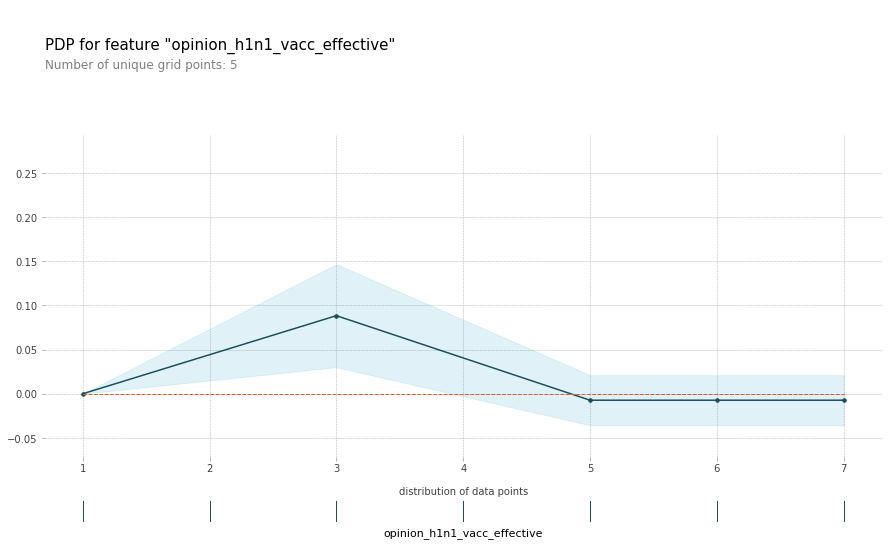

In [ ]:
#1. 변수 하나로만 PDP 그리기
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact_plot, pdp_interact

feature = 'opinion_h1n1_vacc_effective'

isolated = pdp_isolate(
    model = model,
    dataset = X_val_transformed,
    model_features = X_val.columns,
    feature = feature,
    grid_type = 'percentile'
)
pdp_plot(isolated, feature_name=feature , plot_pts_dist = True);

In [ ]:
pipe.named_steps['ordinalencoder'].mapping # 이렇게 보기 힘드니까 Ordinal Encoding에서 mapping 미리 할 수 있으면 좋음.

[{'col': 'opinion_h1n1_vacc_effective', 'mapping': Somewhat Effective      1
  Not Very Effective      2
  Very Effective          3
  Not At All Effective    4
  Dont Know               5
  NaN                     6
  Refused                 7
  dtype: int64, 'data_type': dtype('O')},
 {'col': 'opinion_h1n1_risk', 'mapping': Somewhat Low     1
  Somewhat High    2
  Very Low         3
  NaN              4
  Very High        5
  Dont Know        6
  Refused          7
  dtype: int64, 'data_type': dtype('O')},
 {'col': 'opinion_h1n1_sick_from_vacc', 'mapping': Not At All Worried    1
  Not Very Worried      2
  Dont Know             3
  Somewhat Worried      4
  Very Worried          5
  NaN                   6
  Refused               7
  dtype: int64, 'data_type': dtype('O')},
 {'col': 'opinion_seas_vacc_effective', 'mapping': Very Effective          1
  Somewhat Effective      2
  Not At All Effective    3
  NaN                     4
  Not Very Effective      5
  Dont Know            

([<matplotlib.axis.XTick at 0x7f4e64b7f810>,
 <a list of 7 Text xticklabel objects>)

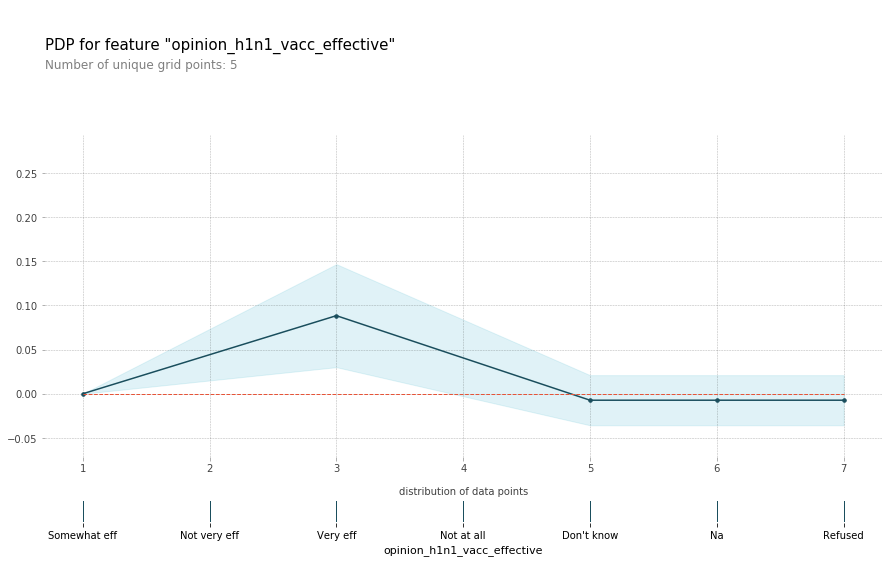

In [ ]:
#   Somewhat Effective      1
#   Not Very Effective      2
#   Very Effective          3
#   Not At All Effective    4
#   Dont Know               5
#   NaN                     6
#   Refused                 7

pdp_plot(isolated, feature_name=feature , plot_pts_dist = True);
plt.xticks([1,2,3,4,5,6,7], ['Somewhat eff', 'Not very eff', 'Very eff', 'Not at all', "Don't know", 'Na', 'Refused'])
# 백신에 대해 긍정적으로 조사한 사람일수록 예측에 많은 영향을 미친다.

In [ ]:
features = ['opinion_h1n1_vacc_effective', 'employment_industry'] # 효과적 설문, 위험 설문 

interaction = pdp_interact(
    model=model, 
    dataset=X_val_transformed,
    model_features=X_val.columns, 
    features=features
)

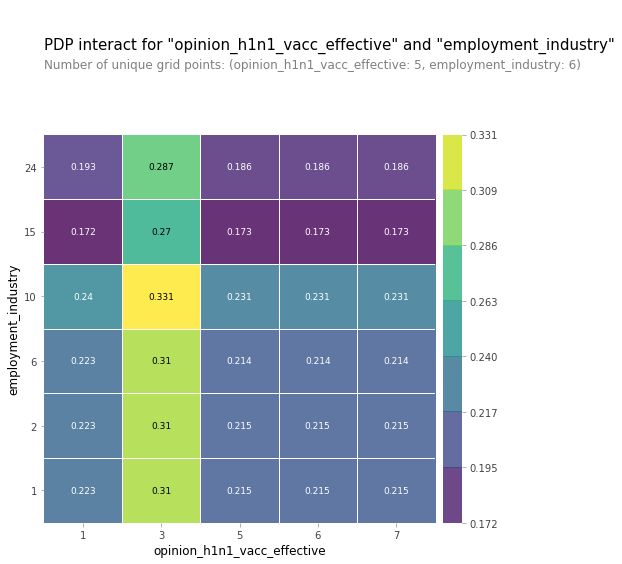

In [ ]:
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features); # 건강, 사회복지와 관련된 직업들이 백신이 효과적으로 답변했고 이 부분이 모델의 예측에 크게 작용했다.
                  # 보험이나 회계와 관련된 종사자들이 백신이 어느정도 효과있다고 답변했는데 애매한 답변인 만큼 모델의 예측에 도움이 크게 되진 않았다.

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


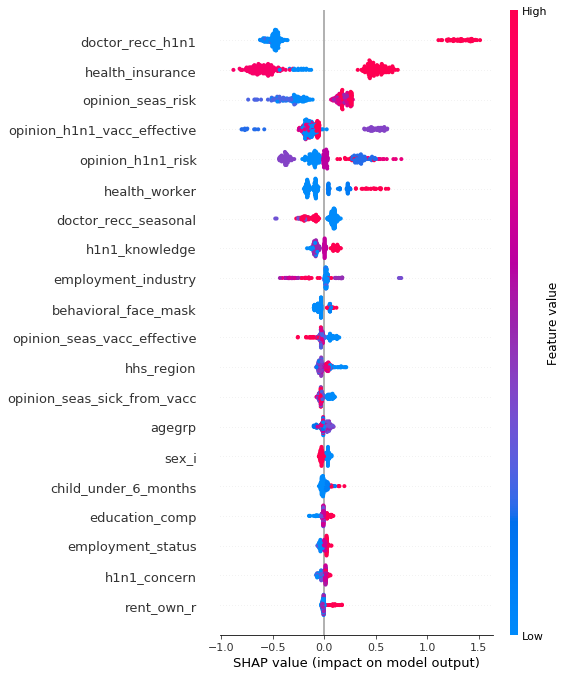

In [ ]:
# shap
import shap
explainer = shap.TreeExplainer(model)
shap.initjs()

shap_values = explainer.shap_values(X_test_transformed.iloc[:300])
shap.summary_plot(shap_values, X_test_transformed.iloc[:300]) 
# 의사의 추천여부가 모델에 크게 영향을 미쳤다.(각각의 점이 완벽히 분류되어 있는것처럼 보임)
# 백신의 효과 설문에서는 1,3과 같은 Effective가 긍정적인 영향, 5,6,7과 같은 애매한 답변이 부정적인 영향을 끼쳤다.
# 하지만 분류 문제를 해석할 때에는 각 범주가 뒤죽박죽 섞여있기때문에 해석에 유의해야 하고
# 데이터가 어느 관측치일 때 모델에 긍정적인 영향을 미치는지 부정적인 영향을 미치는지만 파악하자.

#   Somewhat Effective      1
#   Not Very Effective      2
#   Very Effective          3
#   Not At All Effective    4
#   Dont Know               5
#   NaN                     6
#   Refused                 7

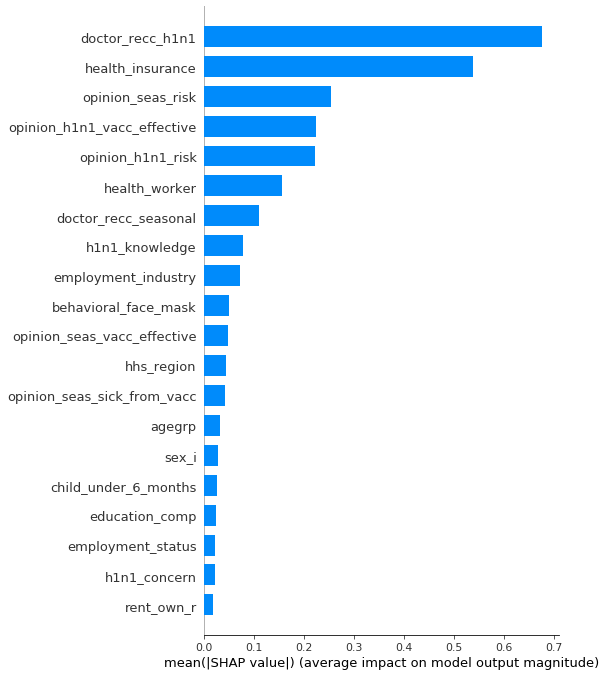

In [ ]:
shap.summary_plot(shap_values, X_test_transformed.iloc[:300], plot_type="bar") # 밑의 특성 중요도와 비교했을 때 약간씩 다른게 있다.
# 하지만 의사추천, 건강보험과 같은 중요한 지표들이 겹치기 때문에
# 결국 중요한 것은 중요한 변수를 여러가지 지표를 참고하여 결정하고 추가적으로 전처리하고 모델의 성능을 높여야한다.

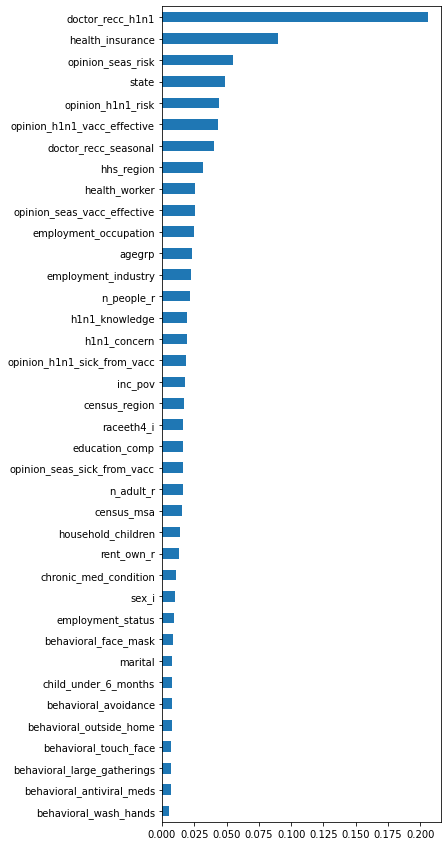

## 4. Choose your ML problems
- 내 문제를 풀기에 ML이 적합한가?
  - 조건에 맞는 데이터 필요
    - 충분한 양
    - 풀고자 하는 문제 상황을 잘 반영
    - 타겟과의 상관관계 존재 
  - Non-ML 방법으로는 풀기 어렵거나 더 이상 성능 향상의 여지가 없을 때
    - 동일한 문제를 푸는 효율적인 Non-ML 방법에 대한 선행조사 필요
  - 장/단기적으로 ML 시스템을 지속하기 위한 비용 부담
  - 비즈니스적으로 의미있는 액션 도출 

- 프로젝트를 수행하기 위한 머신러닝 프로세스
  - 문제 정의 및 데이터 선정 
    - 분류/회귀
    - 예측 타겟 설정
    - 데이터셋 분리 (hold-out/CV)
  - EDA 및 전처리 
  - 기준 모델 설정
  - 모델 학습 
  - 하이퍼파라미터 튜닝
  - 일반화 성능 확인
    - 문제에 적합한 평가지표 선택 
    - 여러 평가지표를 함께 살펴보며 모델의 예측 양상 파악
  - 모델 해석 (PDP/ICE/FI 등)  

### 4-1. Data Leakage
- 훈련 데이터에서는 완벽에 가깝게 예측하였으나 테스트 데이터에서 급격하게 성능 하락 
- 타겟 변수 외에 예측 시점에 사용할 수 없는 데이터를 포함하여 학습
  - 모델이 실제 사용될 때 어떤 데이터만을 가지고 타겟을 예측하는지 분명하게 파악
- 훈련/검증 데이터를 완전히 분리하지 못한 경우 
  - 데이터셋 분리 후 (훈련/검증/테스트) scaling, encoding 등 진행 
  - 파이프라인을 사용하여 코딩 실수에 의한 오류 감소 

### 4-2. 데이터 불균형
- 분류 문제에서 타겟 분포가 불균형할 때, 모델이 데이터를 잘 학습하도록 다음 방법을 사용해 볼 수 있다.
  - `class_weight`
    - scikit-learn 등 대다수 ML 라이브러리에서 옵션 제공 
    - 소수 클래스의 데이터에 더 큰 가중치를 부여하여 불균형 문제 해소 
  - sampling
    - oversampling : 소수 클래스의 데이터로부터 인공 데이터를 생성하여, 소수 클래스의 크기를 다수 클래스의 크기와 비슷하게 키운다. 
    - undersampling : 다수 클래스의 데이터를 모두 학습에 사용하지 않고, 소수 클래스의 수만큼만 샘플링하여 사용한다. 
- 데이터가 불균형할 때 정확도는 적절한 평가지표가 아니므로 정밀도, 재현율, f1, AUC score 등 상황에 맞는 평가지표를 고려해야 한다. 

In [ ]:
pipe = make_pipeline(
    OrdinalEncoder(cols=["make", "class", "ttype", "ftype"]),
    DecisionTreeClassifier(max_depth=6, random_state=42, class_weight="balanced"),
)